In [1]:
#Needed imports and boilerplate
from glob import glob
import afidutils
import pandas as pd
import os

#Analysis Parameters 
midpoint='PMJ' #assign a midpoint for ACPC transformation

In [2]:
#load AFID coordiante data
afid_fcsv = sorted(glob(f'/Users/alaataha/Documents/GitHub/afids-pred/data/coordinate/AFIDs/*/afids_groundtruth/*/anat/*desc-groundtruth_afids.fcsv'))
print(f'number of subjects with AFID annotations: {len(afid_fcsv)}')

#load STN coordiante data
stn_df = pd.read_csv('/Users/alaataha/Documents/GitHub/afids-pred/data/coordinate/STN/STN_all.csv')
stn_fcsv = sorted(glob(f"/Users/alaataha/Documents/GitHub/afids-pred/data/coordinate/STN/*/stn_groundtruth/*/anat/*.fcsv"))
print(f'number of subjects with STN annotations: {len(stn_fcsv)}')

number of subjects with AFID annotations: 202
number of subjects with STN annotations: 70


In [ ]:
# List of datasets to iterate over
DATASETS = ['SNSXPD','SNSXPD1.5T','3T7T_3T','3T7T_7T', 'ADNI', 'AFIDs-HCP', 'AFIDs-OASIS','LHSCPD','SNSXCN']

# Loop through each dataset
for dataset in DATASETS: 
    # Path to AFIDs ground truth directory for the current dataset
    dirafids = f"/Users/alaataha/Documents/GitHub/afids-pred/data/coordinate/AFIDs/{dataset}/afids_groundtruth"
    
    # Get a sorted list of subject IDs (folders that start with "sub-")
    SUBJIDs = sorted([name for name in os.listdir(dirafids) if name.startswith("sub-")])

    # Get list of subject IDs from the STN DataFrame (defined in the first code block)
    stn_df_subjects = stn_df[['subjid']].to_numpy()

    # Loop through each subject
    for subjid in SUBJIDs:
        print(subjid)

        # Find the subject's MRI (*.nii.gz) file
        nii = sorted(glob(f"/Users/alaataha/Documents/GitHub/afid_pred_imaging/{dataset}/{subjid}/anat/{subjid}*.nii.gz"))[0]

        # Find the subject's AFID (*.fcsv) file
        fid_fcsv = sorted(glob(f"/Users/alaataha/Documents/GitHub/afids-pred/data/coordinate/AFIDs/{dataset}/afids_groundtruth/{subjid}/anat/{subjid}*.fcsv"))[0]

        # Generate an interactive HTML visualization of the MRI + AFIDs
        afidutils.generate_interactive_mri_html(
            nii,
            fid_fcsv,
            list(range(1, 33)),  # all AFIDs from 1 to 32
            None, #template standard image
            None, #template standard placement 
            out_file_prefix="/Users/alaataha/Documents/GitHub/afids-pred/data/QC/AFIDs/" # non-bids standard outputs
        )

        # Apply AC-PC transform and MCP centering to AFIDs
        afidutils.transform_afids(
            fid_fcsv,
            output_dir='/Users/alaataha/Documents/GitHub/afids-pred/data/coordinate/AFIDs/', # bids-like outputs (fcsv file + transformation matrix)
            save_matrix=True #saves transformation matrix
        )

        # Check if the current subject has STN ground truth annotations
        if subjid in stn_df_subjects:
            # Find the subject's STN (*.fcsv) file
            substn_fcsv = sorted(glob(f"/Users/alaataha/Documents/GitHub/afids-pred/data/coordinate/STN/{dataset}/stn_groundtruth/{subjid}/anat/{subjid}*.fcsv"))[0]

            # Generate HTML for MRI + STN landmarks
            afidutils.generate_interactive_mri_html(
                nii,
                substn_fcsv,
                [1, 2],  # STN labels, right and left
                None, #template standard placement 
                None, #template standard placement 
                out_file_prefix="/Users/alaataha/Documents/GitHub/afids-pred/data/QC/STN/" # non-bids standard outputs
            )

            # Apply AC-PC + MCP transform to STN file using AFID file as reference
            afidutils.transform_afids(
                substn_fcsv,
                fid_fcsv, #need the AFID file to compute ACPC matrix
                output_dir='/Users/alaataha/Documents/GitHub/afids-pred/data/coordinate/STN', # bids-like outputs (fcsv file + transformation matrix)
                save_matrix=True #saves transformation matrix
            )
        else:
            # If no STN annotation exists
            substn_fcsv = None

sub-P006
Generated: /Users/alaataha/Documents/GitHub/afids-pred/data/QC/AFIDs/sub-P006_ses-preop_run-01_acq-ax_T2w.html
/Users/alaataha/Documents/GitHub/afids-pred/data/coordinate/AFIDs/SNSXPD/afids_mcp/sub-P006/anat/sub-P006_space-MCPPMJ_desc-groundtruth_afids.txt has been generated.
Saved transformed file: sub-P006_space-MCPPMJ_desc-groundtruth_afids.fcsv
Generated: /Users/alaataha/Documents/GitHub/afids-pred/data/QC/STN/sub-P006_ses-preop_run-01_acq-ax_T2w.html
/Users/alaataha/Documents/GitHub/afids-pred/data/coordinate/STN/SNSXPD/stn_mcp/sub-P006/anat/sub-P006_space-MCPPMJ_desc-groundtruth_stn.txt has been generated.
Saved transformed file: sub-P006_space-MCPPMJ_desc-groundtruth_stn.fcsv
sub-P009
Generated: /Users/alaataha/Documents/GitHub/afids-pred/data/QC/AFIDs/sub-P009_ses-preop_run-01_acq-ax_T2w.html
/Users/alaataha/Documents/GitHub/afids-pred/data/coordinate/AFIDs/SNSXPD/afids_mcp/sub-P009/anat/sub-P009_space-MCPPMJ_desc-groundtruth_afids.txt has been generated.
Saved transfo

'/Users/alaataha/Documents/GitHub/afids-pred/figures/all_coordinates_interactive.html'

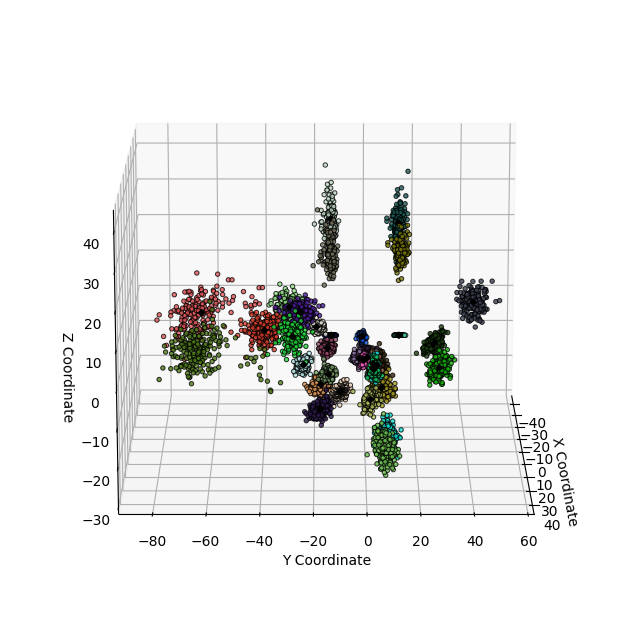

In [3]:
#Fetch all coordinate files (*.fcsv) in MCP space and plot them interactively
afid_fcsv_mcp = sorted(glob(f'/Users/alaataha/Documents/GitHub/afids-pred/data/coordinate/*/*/*_mcp/sub-*/anat/sub-*MCP*.fcsv'))
afidutils.plot_multiple_files(afid_fcsv_mcp, "/Users/alaataha/Documents/GitHub/afids-pred/figures/all_coordinates_interactive.html", rotation=False, trace_lines=False, save_gif=True, gif_filename='/Users/alaataha/Documents/GitHub/afids-pred/figures/all_coordinates.gif')